<a href="https://colab.research.google.com/github/adamalavi/SHALA2020/blob/master/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [120]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [121]:
attrition_data['Gender'] = attrition_data['Gender'].map(dict(zip(['Male','Female'],[0,1])))
attrition_data['OverTime'] = attrition_data['OverTime'].map(dict(zip(['No','Yes'],[0,1])))
attrition_new = pd.get_dummies(attrition_data, columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])
attrition_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
norm_pending = attrition_new[["DailyRate", "MonthlyIncome", "MonthlyRate"]]
normalized_DR =(norm_pending['DailyRate']/norm_pending['DailyRate'].max()) *10
normalized_MI =(norm_pending['MonthlyIncome']/norm_pending['MonthlyIncome'].max()) *10
normalized_MR =(norm_pending['MonthlyRate']/norm_pending['MonthlyRate'].max()) *10

In [123]:
attrition_new = attrition_new.drop(['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber', 'EmployeeCount', 'ID'], axis=1)
attrition_new['Norm_DR'] = normalized_DR
attrition_new['Norm_MI'] = normalized_MI 
attrition_new['Norm_MR'] = normalized_MR
attrition_new.head() 

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Norm_DR,Norm_MI,Norm_MR
0,41,1,1,2,2,1,94,3,2,4,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,7.351568,2.996650,7.214712
1,49,0,8,1,3,0,61,2,2,2,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.861241,2.565128,9.225156
2,37,1,2,2,4,0,92,2,1,3,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,9.159440,1.045052,0.887440
3,33,0,3,4,4,1,56,3,1,3,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,9.286191,1.454573,8.577725
4,27,0,2,1,1,0,40,3,1,2,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3.942628,1.734087,6.160228


In [0]:
X = attrition_new.drop(['Attrition'], axis = 1)
y = attrition_new['Attrition']

### **RANDOM FOREST CLASSIFICATION**

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=17)
rfc = RandomForestClassifier(n_estimators=8, random_state=881)
rfc.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, rfc.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, rfc.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       689
           1       1.00      0.86      0.92       133

    accuracy                           0.98       822
   macro avg       0.99      0.93      0.95       822
weighted avg       0.98      0.98      0.98       822

The testing results are :
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       167
           1       0.50      0.15      0.24        39

    accuracy                           0.81       206
   macro avg       0.66      0.56      0.56       206
weighted avg       0.77      0.81      0.77       206



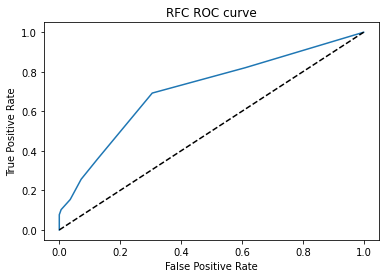

In [126]:
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()

### **DECISION TREE CLASSIFICATION**

In [138]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, dtc.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, dtc.predict(X_test)))
#OVERFITTING

The training results are :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       689
           1       1.00      1.00      1.00       133

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

The testing results are :
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       167
           1       0.27      0.26      0.26        39

    accuracy                           0.73       206
   macro avg       0.55      0.55      0.55       206
weighted avg       0.72      0.73      0.73       206



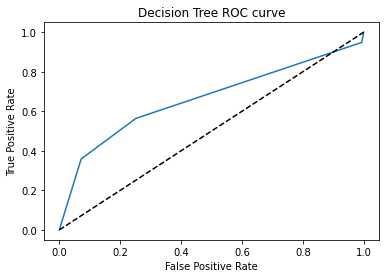

In [136]:
probs = dtc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

### **XGB CLASSIFICATION**

In [129]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, xgb_clf.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, xgb_clf.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       689
           1       0.88      0.27      0.41       133

    accuracy                           0.88       822
   macro avg       0.88      0.63      0.67       822
weighted avg       0.88      0.88      0.85       822

The testing results are :
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       167
           1       0.75      0.23      0.35        39

    accuracy                           0.84       206
   macro avg       0.80      0.61      0.63       206
weighted avg       0.83      0.84      0.80       206



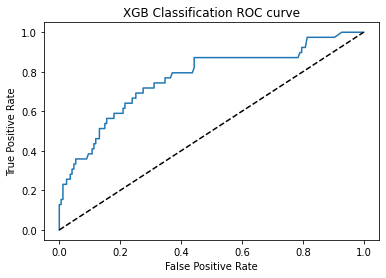

In [130]:
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classification ROC curve')
# show the plot
plt.show()

### **DECISION TREE CLASSIFICATION WITH GRID SEARCH**

In [0]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [132]:
grid_search.fit(X_train, y_train)
print('The training results are :')
print(classification_report(y_train, grid_search.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, grid_search.predict(X_test)))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The training results are :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       689
           1       0.62      0.34      0.44       133

    accuracy                           0.86       822
   macro avg       0.75      0.65      0.68       822
weighted avg       0.84      0.86      0.84       822

The testing results are :
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       167
           1       0.54      0.36      0.43        39

    accuracy                           0.82       206
   macro avg       0.70      0.64      0.66       206
weighted avg       0.80      0.82      0.81       206



[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.1s finished


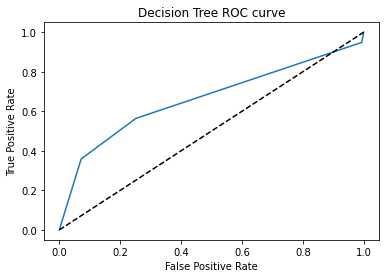

In [133]:
probs = grid_search.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

In [134]:
grid_search.best_params_, grid_search.best_score_

({'max_leaf_nodes': 4, 'min_samples_split': 2}, 0.8394160583941606)

In [139]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  